<a href="https://colab.research.google.com/github/chettkulkarni/deep_learning/blob/master/MNSIT_Classification_using_only_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNSIT number classification using library



1.   Import all the libraries
2.   Load MNSIT dataset, and augument some images to make sure our classifier identifies rotated numbers
3.   encode the labels one hot encoded
4.   Creating activation functions and derivates of activation function to use during the course of algorithm
5.   Number of Iterations, Neurons , layers are decided
6. Learning rates is fixed at each layer
7. Weights are randomly initialsed and data is passed across the




#Importing the libraries

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import random as random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
random. seed(1)

Using TensorFlow backend.


#Loading the dataset

Augument the images,rotate some images to regularise

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train[0:5000]
Y_train = Y_train[0:5000]

augument_x=X_train[0:100]
augument_y=Y_train[0:100]

aug = ImageDataGenerator(rotation_range=90)
aug.fit(X_train)
full= aug.flow(augument_x, augument_y,batch_size=len(augument_x))

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
for images,labels in full:
  x_train = np.concatenate((X_train,images),axis = 0)
  y_train = np.concatenate((Y_train,labels),axis = 0)
  break


#Normalizing image datasets

In [0]:
images = (x_train.reshape(len(x_train),28*28))/255
labels=y_train

In [6]:
images.shape

(5100, 784)

In [7]:
labels.shape

(5100,)

#Encode labels to have one one hot encoding
eg:


```
0 - 1 0 0 0 0 0 0 0 0 0
1 - 0 1 0 0 0 0 0 0 0 0
2 - 0 0 1 0 0 0 0 0 0 0
3 - 0 0 0 1 0 0 0 0 0 0
and so on
```




In [0]:
one_hot_labels = np.zeros((len(labels),10))

In [0]:
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

Also normalise test dataset

In [0]:
test_images = X_test.reshape(len(X_test),28*28)/255
test_labels = np.zeros((len(Y_test),10))


In [0]:
for i,l in enumerate(Y_test):
  test_labels[i][l] = 1

#Defining different activation function and there derivatives

In [0]:
def tanh(x):
  return np.tanh(x)

def tanh2deriv(output):
  return 1 - (output ** 2)

def relu(x):
  return (x>=0)*x

def relu2deriv(x):
  return x>=0


#Number of iterations, and different hidden layer sizes
iterations will be the number of times the weights are to be updated till you
layeer- number of layers

#Setting learning rate per layer - 3 layer


In [0]:
iterations , hidden_size, hidden_size_2 = (150,100,100)
alpha1,alpha2,alpha3 = 2, 2.5 ,3

In [0]:
inputPixels , num_labels = (784,10)

#batch size 

In [0]:
batch_size = 200

#Weights between each layer ,randomly selected for the first iteration

#**total 3 layers**

In [0]:
weights_0_1 = 0.02*np.random.random((inputPixels,hidden_size))-0.01
weights_1_2 = 0.2*np.random.random((hidden_size,hidden_size_2))-0.10
weights_2_3 = 0.3*np.random.random((hidden_size_2,num_labels))- 0.1



```
for each iteration :-

- propogate the layer weghts from input to output layer
- compare the output layer with the actual layer, calculate the error
- propogate the layer back
- using the error recalculate the weights 

```



#also having a dropout masks , Run the back propagation algorithm

In [17]:
for j in range(iterations):
  correct_cnt = 0
  for i in range(int(len(images) / batch_size)):
    
    batch_start, batch_end = ((i * batch_size), ((i + 1)*batch_size))
    layer_0 = images[batch_start:batch_end]

    layer_1 = tanh(np.dot(layer_0,weights_0_1))
    dropout_mask = np.random.randint(2,size=layer_1.shape)
    layer_1 *= dropout_mask*2

    layer_2 = relu(np.dot(layer_1,weights_1_2))

    dropout_mask = np.random.randint(2,size=layer_2.shape)
    layer_2 *= dropout_mask*2

    layer_3 = relu(np.dot(layer_2,weights_2_3))

    for k in range(batch_size):
      correct_cnt += int(np.argmax(layer_3[k:k+1])== np.argmax(labels[batch_start+k:batch_start+k+1]))
    
    layer_3_delta = (labels[batch_start:batch_end] - layer_3) / (batch_size * layer_3.shape[0])
    layer_2_delta = layer_3_delta.dot(weights_2_3.T) * relu2deriv(layer_2)
    layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)


    weights_2_3 += alpha3 * layer_2.T.dot(layer_3_delta)
    weights_1_2 += alpha2 * layer_1.T.dot(layer_2_delta)
    weights_0_1 += alpha1 * layer_0.T.dot(layer_1_delta)

  test_correct_cnt = 0
  test_labels_y=[]
  original_labels_y=[]
  for i in range(len(test_images)):
    layer_0 = test_images[i:i+1]
    layer_1 = tanh(np.dot(layer_0,weights_0_1))
    layer_2 = relu(np.dot(layer_1,weights_1_2))
    layer_3 = np.dot(layer_2,weights_2_3)
    test_labels_y += [int(np.argmax(layer_3))]
    original_labels_y += [np.argmax(test_labels[i:i+1])]
    test_correct_cnt += int(np.argmax(layer_3) == np.argmax(test_labels[i:i+1]))
  
  if(j % 10 == 0):
    print(10*'*','iteration:',j)
    print('Train Accuracy :- ', str(correct_cnt/float(len(images))))
    print('Test  Accuracy :-',str(test_correct_cnt/float(len(test_images))) )

********** iteration: 0
Train Accuracy :-  0.1623529411764706
Test  Accuracy :- 0.5096
********** iteration: 10
Train Accuracy :-  0.39784313725490195
Test  Accuracy :- 0.6424
********** iteration: 20
Train Accuracy :-  0.47627450980392155
Test  Accuracy :- 0.6961
********** iteration: 30
Train Accuracy :-  0.5403921568627451
Test  Accuracy :- 0.7467
********** iteration: 40
Train Accuracy :-  0.6037254901960785
Test  Accuracy :- 0.7888
********** iteration: 50
Train Accuracy :-  0.6615686274509804
Test  Accuracy :- 0.8179
********** iteration: 60
Train Accuracy :-  0.6949019607843138
Test  Accuracy :- 0.8264
********** iteration: 70
Train Accuracy :-  0.7272549019607844
Test  Accuracy :- 0.834
********** iteration: 80
Train Accuracy :-  0.7425490196078431
Test  Accuracy :- 0.8447
********** iteration: 90
Train Accuracy :-  0.7490196078431373
Test  Accuracy :- 0.8508
********** iteration: 100
Train Accuracy :-  0.7505882352941177
Test  Accuracy :- 0.8563
********** iteration: 110
Train

#confusion matrix

In [23]:
cf=confusion_matrix(original_labels_y, test_labels_y)
cf

array([[ 953,    0,    1,    3,    2,    5,    7,    1,    8,    0],
       [   0, 1085,    1,    3,    1,    2,    5,    0,   38,    0],
       [  16,   23,  840,   23,   22,    0,   20,   17,   69,    2],
       [  14,    2,   32,  782,    0,   99,    5,   21,   47,    8],
       [   1,    2,    3,    0,  878,    0,   14,    2,   24,   58],
       [  33,    5,   13,   30,   12,  697,   22,    4,   72,    4],
       [  36,    2,    9,    0,   25,   20,  855,    0,   11,    0],
       [   6,   32,   24,    1,    8,    0,    0,  912,    4,   41],
       [   7,   11,    7,    6,   11,   20,   13,   10,  879,   10],
       [  10,    5,    3,    8,  114,    8,    3,   32,   24,  802]])

#accuracy _final iteration

In [19]:
accuracy_score(original_labels_y, test_labels_y)*100

86.83

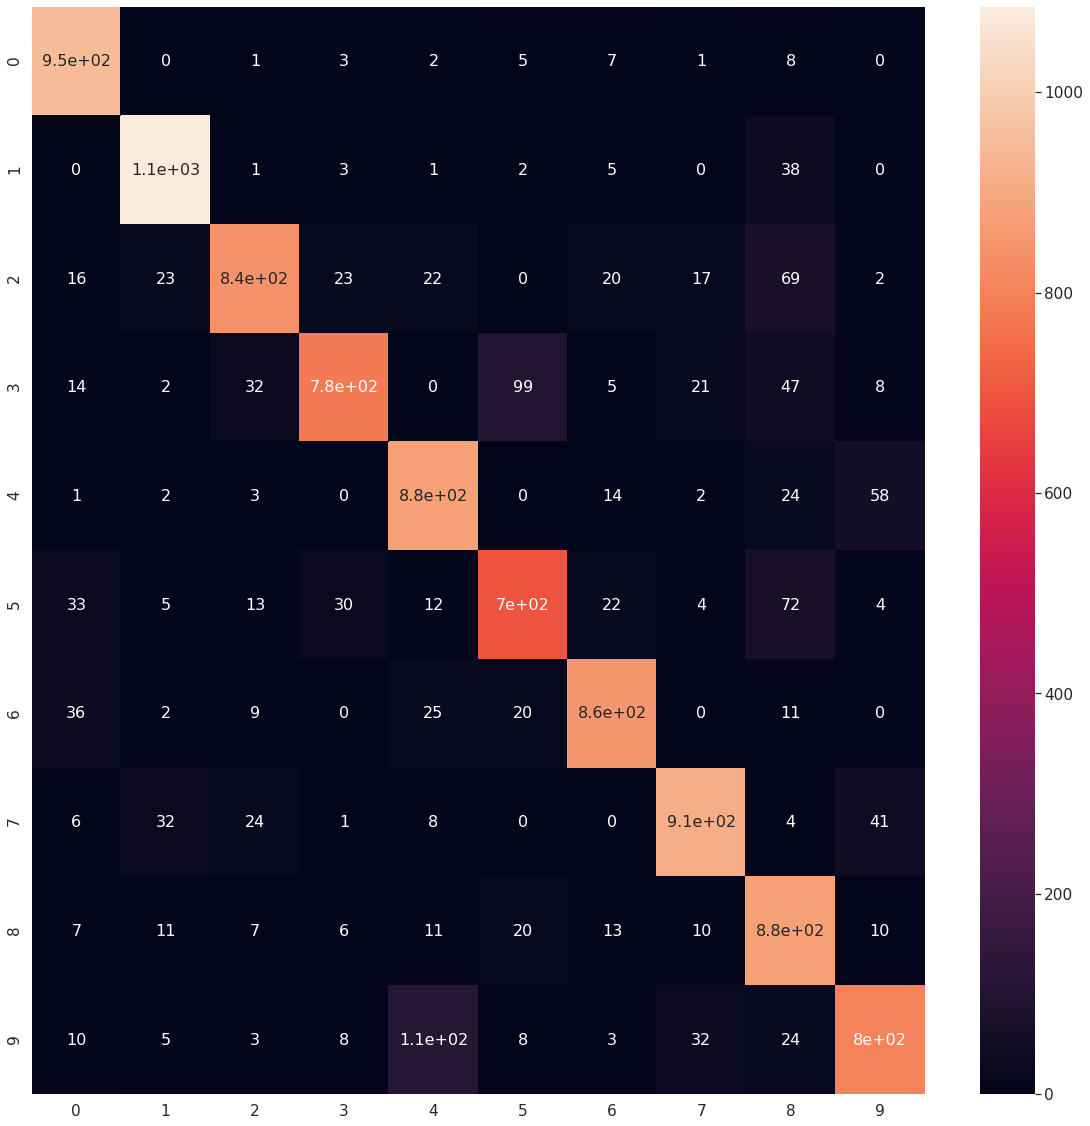

In [29]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(cf, range(10), range(10))
pyplot.figure(figsize=(20,20))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size